In [1]:
import pandas as pd
import numpy as np
import networkx as net
import itertools
import copy
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/maksim2042/SNABook/master/chapter1/egypt_retweets.net", 
                 sep = ' ', skiprows=2, nrows = 25178, header = None)

In [3]:
df.columns =['Id', 'Name', 'w1', 'w2', 'shape']

In [4]:
df.head()

,Id,Name,w1,w2,shape
0,1,partager1973,0.0,0.0,ellipse
1,2,RaoufRamahy,0.0,0.0,ellipse
2,3,annaberlin1983,0.0,0.0,ellipse
3,4,alexander_drake,0.0,0.0,ellipse
4,5,TwiddleEastNews,0.0,0.0,ellipse


In [54]:
df[df.Name == 'justinbieber'].Id.values

array([9536], dtype=int64)

In [5]:
nodelist = df[['Id', 'Name']].to_dict('index')

In [6]:
df.describe()

,Id,w1,w2
count,25178.000000,25178.0,25178.0
mean,12589.500000,0.0,0.0
std,7268.406875,0.0,0.0
min,1.000000,0.0,0.0
25%,6295.250000,0.0,0.0
50%,12589.500000,0.0,0.0
75%,18883.750000,0.0,0.0
max,25178.000000,0.0,0.0


In [7]:
edges = pd.read_csv("https://raw.githubusercontent.com/maksim2042/SNABook/master/chapter1/egypt_retweets.net", 
                 sep = ' ', skiprows=25181, header = None)

In [8]:
edges.columns = ['Node1', 'Node2', 'weight']

In [9]:
edges.describe()

,Node1,Node2,weight
count,32785.000000,32785.000000,32785.000000
mean,8777.785847,17027.304682,3.476681
std,6028.809815,5776.181166,4.961567
min,1.000000,6.000000,1.000000
25%,3463.000000,13194.000000,1.000000
50%,8029.000000,17991.000000,2.000000
75%,13240.000000,21798.000000,4.000000
max,25117.000000,25178.000000,306.000000


In [10]:
edges.head()

,Node1,Node2,weight
0,1,2885,3
1,2,7200,1
2,3,15981,1
3,4,17809,2
4,5,17889,1


In [11]:
edgelist = np.array(edges)

In [12]:
# Create empty graph
g = net.Graph()

In [14]:
# Add edges and edge attributes
g.add_weighted_edges_from(edgelist)

In [15]:
# Add node attributes
net.set_node_attributes(g, nodelist)

In [16]:
# net.draw(g, pos=net.spring_layout(g))
# plt.show()

In [17]:
x=[len(c) for c in net.connected_component_subgraphs(g)]

(array([3.121e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000e+00, 1.77710e+03, 3.55320e+03, 5.32930e+03, 7.10540e+03,
        8.88150e+03, 1.06576e+04, 1.24337e+04, 1.42098e+04, 1.59859e+04,
        1.77620e+04]),
 <a list of 10 Patch objects>)

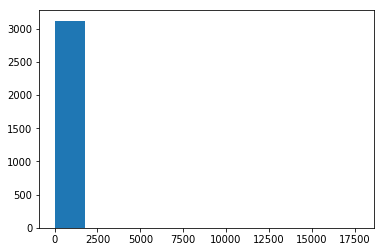

In [18]:
plt.hist(x)

In [19]:
len(list(list(net.connected_component_subgraphs(g))[0]))

17762

In [20]:
[len(c) for c in net.connected_component_subgraphs(g) if len(c) > 10]

[17762, 64, 16, 13, 11, 11, 14, 16]

## Island in the Network

##### Water level

In [36]:
def trim_edges(g, weight=1):
    g2=net.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f, to, weight = edata)
    return g2

#### How water level should be raised

In [37]:
def island_method(g, iterations=5):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [39]:
cc=list(net.connected_component_subgraphs(g))[0]
islands=island_method(cc)
for i in islands:
    # print the threshold level, size of the graph, and number of connected components
    print(i[0], len(list(i[1])), len(list(net.connected_component_subgraphs(i[1])))) 

1 12360 314
62 27 11
123 8 3
184 5 2
245 5 2


In [ ]:
g.edges(data=True)

### Extracting and Visualizing Ego Networks with Python

In [57]:
list(net.ego_graph(g, 9536))

[9536,
 7876,
 1285,
 17389,
 22576,
 1906,
 18290,
 23252,
 13109,
 25173,
 21172,
 3385,
 22012,
 10943]

#### we need to convert the ego network from a Multi-graph to a simple Graph

In [58]:
bieb = net.Graph(net.ego_graph(cc,9536, radius=2))

In [59]:
len(bieb)

22

In [60]:
net.average_clustering(bieb)

0.12727272727272726

In [64]:
 Id_Ghonim = df[df.Name=='Ghonim'].values[0][0]

In [65]:
ghonim= net.Graph(net.ego_graph(cc, Id_Ghonim, radius=2))

In [66]:
len(ghonim)

3450

In [67]:
net.average_clustering(ghonim)

0.04332254475699312

In [69]:
#ls
